# M77 Coursework: 3D "Pac-Man"
The following coursework is designed to test multiple components of the module sylabus; including 3D geometry, object detection, feature extraction and image manipulation.

Your task is to complete the below skeleton code to play a Pac-Man-esque game in 3D. You are allowed to utilise method discussed in the course, including feature extractors and deep learning approaches.

The aim of the coursework is to step through a 3D pointcloud of the old PhD lab at Swansea University. Several large spheres have been placed within the space, it is your job to move through the pointcloud in an automated fashion, detecting the location of the sphere and moving to the predicted 3D location. If you land close enough to a sphere it will be captured and removed from the pointcloud. 

You will need to decide what kinds of feature you want to use, extract these features and train a classifier to detect the spheres within an image. You can then use the functionality provided in the PacMan_functionality.py module to obtain the XYZ coordinates of the pixel you predict to be a sphere.


## Imports
Hre we will do our usual imports. I would recommend numpy, scipy, skimage, matplotlib and sklearn. If you wish to utilise the pointcloud processing toolkit you can do that as described in the handout. We will want to import our PacMan_functionality module as well.

In [1]:
import PacMan_functionality as PacMan
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import pptk

# For plotting:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For operating-system tools and file-finding
import os
import glob
from os import listdir

# For resizing images
import skimage
import skimage.transform

import numpy as np
from sklearn.model_selection import train_test_split

# For deep learning functionality
import tensorflow as tf
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPool2D
from tensorflow.python.keras.layers import SimpleRNN, LSTM

## Game setup.
This cell will initialise the game world and add all of our spheres to the world. Do not edit the code here.

In [6]:
# Call startup_scene() to load the initial game scene
global_cloud, spheres_collected = PacMan.startup_scene()

In [7]:
# View our pointcloud if we want
v = pptk.viewer(global_cloud['Positions'], global_cloud['Colors']/255) # Fast, requires pptk
PacMan.show_point_cloud(global_cloud) # Slow, requires matplotlib

## Load the training data: Positives and Negatives
In the handout zip file there is a directory which contains numerous patches extracted from sample images. These patches are labelled as either containing a sphere or not. You may wish to use these to train a classifier for sphere detection.

In [8]:
# Get the training samples for both positive and negative patches

# Placeholders for the information from disk
img = []
dep = []
infra = []

neg_img = []
neg_dep = []
neg_infra = []

# Negatives
negative_path_to_data = os.getcwd()  + "/TrainingImages/negatives" # Edit this if data is another directory
negative_data_files = glob.glob(negative_path_to_data + "/negativePatch_*.jpg") # Change this to collect from saved images.
negative_n_frames = np.max([int(elem[-6:-4]) for elem in negative_data_files]) + 1

# Positives
positive_path_to_data = os.getcwd()  + "/TrainingImages/positives" # Edit this if data is another directory
positive_data_files = glob.globpositive_(path_to_data + "/positivePatch_*.jpg") # Change this to collect from saved images.
positive_n_frames = np.max([int(elem[-6:-4]) for elem in positive_data_files]) + 1

# Concatenate the patches into a 4D numpy array (S*H*W*C.jpgnd create a label vector (S).jpg.jpg

ValueError: invalid literal for int() with base 10: '_8'

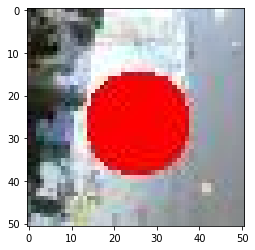

(51, 51, 3)


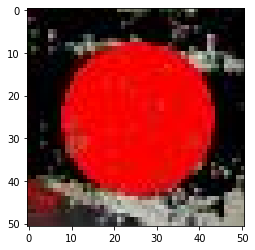

(51, 51, 3)


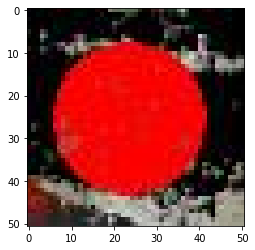

(51, 51, 3)


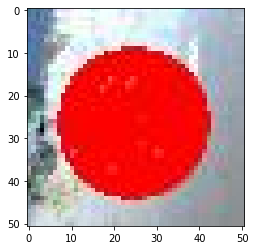

(51, 51, 3)


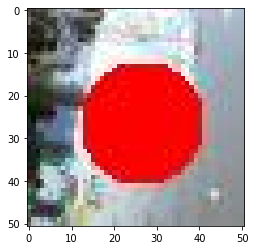

(51, 51, 3)


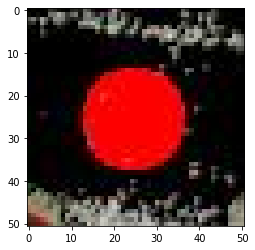

(51, 51, 3)


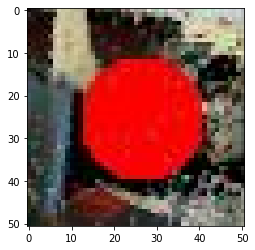

(51, 51, 3)


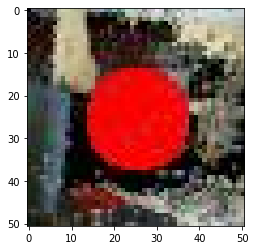

(51, 51, 3)


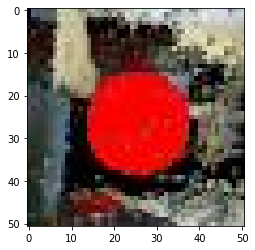

(51, 51, 3)


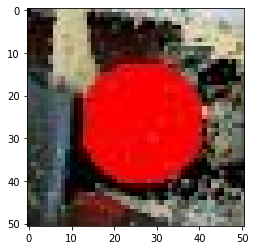

(51, 51, 3)


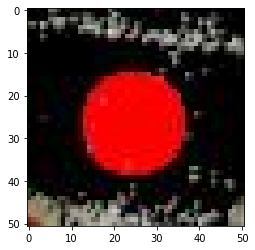

(51, 51, 3)


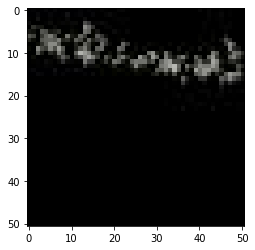

(51, 51, 3)


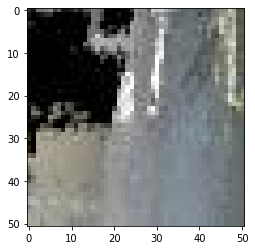

(51, 51, 3)


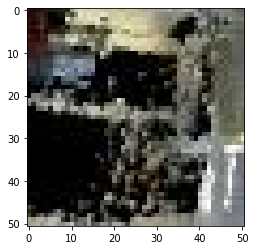

(51, 51, 3)


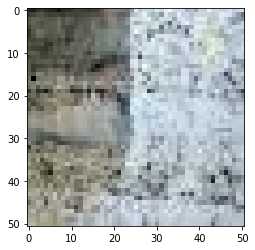

(51, 51, 3)


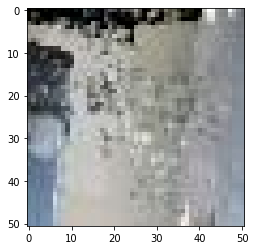

(51, 51, 3)


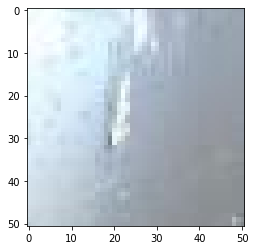

(51, 51, 3)


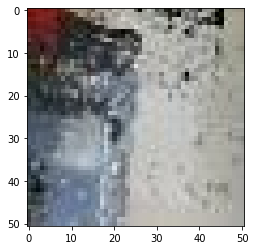

(51, 51, 3)


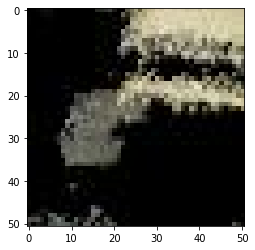

(51, 51, 3)


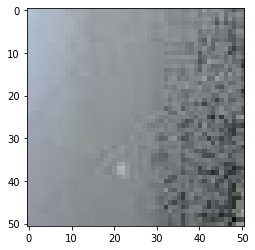

(51, 51, 3)


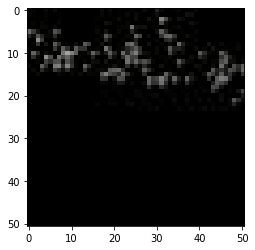

(51, 51, 3)


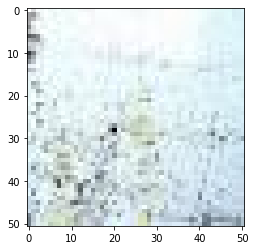

(51, 51, 3)
(2908, 51, 51, 3)
(2908,)


In [2]:
pos_loaded_images = list()
neg_loaded_images = list()
all_images = list()
labels = list()

count = 0
for filename in listdir('TrainingImages/positives'):
    img_data = cv2.imread('TrainingImages/positives/' + filename)
    if count < 11:
        plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
        plt.show()  # display!
        print(img_data.shape)
        count += 1

    all_images.append(img_data)
    labels.append(int(1))
    #print('> loaded %s %s' % (filename, img_data.shape))

count = 0
for filename in listdir('TrainingImages/negatives'):
    img_data = cv2.imread('TrainingImages/negatives/' + filename)
    if count < 11:
        plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
        plt.show()  # display!
        print(img_data.shape)
        count += 1

    all_images.append(img_data)
    labels.append(int(0))
    #print('> loaded %s %s' % (filename, img_data.shape))

all_data = asarray(all_images)
labels = asarray(labels)
print(all_data.shape)
print(labels.shape)

In [18]:
# https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
# https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

## Train a classifier on the samples, this may require feature extraction on the patches
Depending on your desired apporach you may want to extract features on the training patches you have been given. These can then be used to train our desired classifier to detect the patches based not on the raw data, but on a representative feature descriptor. Several are talked about both in the lectures and labs. 

In [ ]:
# Extract the features - maybe, might not be needed with representation learning approaches

In [ ]:
# Train a classification model to perform binary classification of the patch into whether it contains a sphere.

In [5]:
# Split data sets

X = all_data
y = labels

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33) # Was removed from the end , random_state=42

print(X_train.shape)
print(X_test.shape)

X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape)
print(X_test.shape)

(1948, 51, 51, 3)
(960, 51, 51, 3)
(1948, 51, 51, 3)
(960, 51, 51, 3)


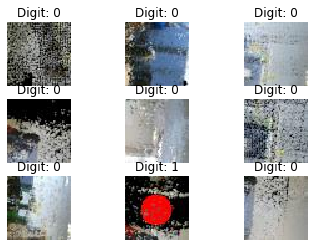

In [16]:
#(X_train, y_train), (X_test, y_test) = X, y

X = all_data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33) # Was removed from the end , random_state=42



# Get the one-hot encoded labels
n_class = len(np.unique(y_train))
Y_train = np.eye(n_class)[y_train]
Y_test = np.eye(n_class)[y_test]

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))#plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.axis('off')



In [17]:
#CNN

'''
# Normalize the data to help with training
X_train_CNN = np.expand_dims(X_train, axis=-1)
X_test_CNN = np.expand_dims(X_test, axis=-1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255
X_test_CNN /= 255
'''

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Conv2D(10, (3, 3), input_shape=(X_train.shape[1], X_train.shape[2], 3)))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the dense head layer
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))

# Create the output layer
model.add(Dense(2))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Train on 1558 samples, validate on 390 samples
Epoch 1/10
1558/1558 [==============================] - 1s 778us/sample - loss: 13.9290 - accuracy: 0.9506 - val_loss: 6.1558e-04 - val_accuracy: 1.0000
Epoch 2/10
1558/1558 [==============================] - 1s 445us/sample - loss: 0.0622 - accuracy: 0.9981 - val_loss: 2.6597e-04 - val_accuracy: 1.0000
Epoch 3/10
1558/1558 [==============================] - 1s 447us/sample - loss: 0.0833 - accuracy: 0.9981 - val_loss: 3.6204e-04 - val_accuracy: 1.0000
Epoch 4/10
1558/1558 [==============================] - 1s 447us/sample - loss: 8.4062e-04 - accuracy: 1.0000 - val_loss: 3.2623e-04 - val_accuracy: 1.0000
Epoch 5/10
1558/1558 [==============================] - 1s 461us/sample - loss: 8.3863e-04 - accuracy: 1.0000 - val_loss: 3.0280e-04 - val_accuracy: 1.0000
Epoch 6/10
1558/1558 [==============================] - 1s 450us/sample - loss: 0.0038 - accuracy: 0.9994 - val_loss: 8.2434e-05 - val_accuracy: 1.0000
Epoch 7/10
1558/1558 [==========

In [14]:
#X_test = X_test.astype('float32')

predicted_probability = model.predict(X_test)

predicted_class = predicted_classes = model.predict_classes(X_test)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print("{0} classified correctly".format(len(correct_preds)))
print("{0} classified incorrectly".format(len(incorrect_preds)))
print("{0:.2f}% of test set classified correctly".format(len(correct_preds) / len(y_test) * 100))

958 classified correctly
2 classified incorrectly
99.79% of test set classified correctly


## Initialise our starting point in the game and get our first view into the scene
We should start the game at a position of XYZ = [0, 0, 0] and a camera angle of [0, 0, 0]. These variables can be updated once we find a sphere, or rotated when we don't find a sphere. We can then get our first image projected to the camera plane to start our game. 

In [ ]:
# Initialise position and angle variable 
position = np.zeros([3])
angle = np.zeros([3])

In [ ]:
# Get the image, XYZ maps and depth map of the current viewpoint into the scene

## Perform our loop, in which we will perform pixel-wise prediction on binary class label and then perform the correct action based on detection of spheres.
This will be the main bulk of your implementation, utilising the feature descriptors and trained models from the above cells. In each loop of the program we will want to:
-  Get current view into the scene
-  Extract patches from the scene
-  Extract features on the patches
-  Use the pretrained model to obtain class prediction probabilities
-  Identify if a sphere has been found in the scene
  -  If so, find the mapped XYZ location, move there and update the scene
  -  If not, rotate the camera in a bid to find the sphere


In [ ]:
while not np.all(spheres_collected): # While there are spheres to find
    # Get current image from viewpoint
    
    # Extract patches from the scene
    
    # Extract features from the patches
    
    # Predict the probability of a pixel being a sphere, based on the patch
    
    # Use probabilities to find sphere coordinates in 3D
    
    # Update camera appropriately
    
    # Update scene if needed